In [1]:
import mdn
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook

## Generate Synthetic Data

<IPython.core.display.Javascript object>


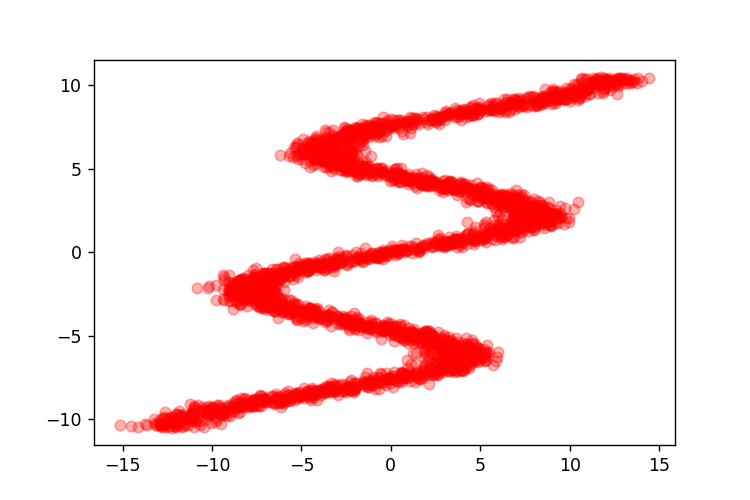

In [2]:
## Generating some data:
NSAMPLE = 3000

y_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
x_data = x_data.reshape((NSAMPLE, 1))

plt.figure(figsize=(6, 4))
plt.plot(x_data,y_data,'ro', alpha=0.3)
plt.show()

In [4]:
y_data.shape

(3000,)

In [13]:
# ===============
# BUILD THE MODEL
# ===============

N_HIDDEN = 15
N_MIXES = 10

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(mdn.MDN(1, N_MIXES))
model.compile(loss=mdn.get_mixture_loss_func(1, N_MIXES), optimizer=keras.optimizers.Adam()) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
mdn_1 (MDN)                  (None, 30)                480       
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


In [5]:
# ===============
# TRAIN THE MODEL
# ===============

history = model.fit(x=x_data, y=y_data, batch_size=128, epochs=500, validation_split=0.15)

Epoch 1/500
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
20/20 [==============================] - 11s 160ms/step - loss: 9.6633 - val_loss: 8.3067
Epoch 2/500
20/20 [==============================] - 0s 8ms/step - loss: 7.6099 - val_loss: 6.7062
Epoch 3/500
20/20 [==============================] - 0s 7ms/step - loss: 6.1830 - val_loss: 5.7263
Epoch 4/500
20/20 [==============================] - 0s 8ms/step - loss: 5.3677 - val_loss: 4.9416
Epoch 5/500
20/20 [==============================] - 0s 8ms/step - loss: 4.5198 - val_loss: 4.3548
Epoch 6/500
20/20 [==============================] - 0s 8ms/step - loss: 4.0687 - val_loss: 3.9804
Epoch 7/500
20/20 [==============================] - 0s 20ms/step - loss: 3.8188 - val_loss: 3.7976
Epoch 8/500
20/20 [==============================] - 0s 10ms/step - loss: 3.7126 - val_loss: 3.6769
Epoch 9/500
20/20 [==============================] - 0s 8ms/step - loss: 3.5698 - val_loss: 3.5961
Epoch 10/500
20/2

20/20 [==============================] - 0s 10ms/step - loss: 1.7763 - val_loss: 1.7551
Epoch 159/500
20/20 [==============================] - 0s 10ms/step - loss: 1.7484 - val_loss: 1.7687
Epoch 160/500
20/20 [==============================] - 0s 7ms/step - loss: 1.7610 - val_loss: 1.7499
Epoch 161/500
20/20 [==============================] - 0s 7ms/step - loss: 1.7593 - val_loss: 1.7505
Epoch 162/500
20/20 [==============================] - 0s 7ms/step - loss: 1.7340 - val_loss: 1.7579
Epoch 163/500
20/20 [==============================] - 0s 15ms/step - loss: 1.7424 - val_loss: 1.7692
Epoch 164/500
20/20 [==============================] - 0s 10ms/step - loss: 1.7574 - val_loss: 1.7519
Epoch 165/500
20/20 [==============================] - 0s 9ms/step - loss: 1.7446 - val_loss: 1.7479
Epoch 166/500
20/20 [==============================] - 0s 9ms/step - loss: 1.7288 - val_loss: 1.7989
Epoch 167/500
20/20 [==============================] - 0s 9ms/step - loss: 1.7552 - val_loss: 1.7468


Epoch 319/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3589 - val_loss: 1.4273
Epoch 320/500
20/20 [==============================] - 0s 8ms/step - loss: 1.4172 - val_loss: 1.4225
Epoch 321/500
20/20 [==============================] - 0s 8ms/step - loss: 1.4050 - val_loss: 1.4298
Epoch 322/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3555 - val_loss: 1.4193
Epoch 323/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3608 - val_loss: 1.4293
Epoch 324/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3732 - val_loss: 1.4309
Epoch 325/500
20/20 [==============================] - 0s 12ms/step - loss: 1.3938 - val_loss: 1.4320
Epoch 326/500
20/20 [==============================] - 0s 10ms/step - loss: 1.4177 - val_loss: 1.4192
Epoch 327/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3660 - val_loss: 1.4332
Epoch 328/500
20/20 [==============================] - 0s 8ms/step - loss: 1.4006 - val_l

20/20 [==============================] - 0s 8ms/step - loss: 1.3426 - val_loss: 1.3968
Epoch 401/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3553 - val_loss: 1.4009
Epoch 402/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3795 - val_loss: 1.4095
Epoch 403/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3531 - val_loss: 1.3984
Epoch 404/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3332 - val_loss: 1.4036
Epoch 405/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3589 - val_loss: 1.4005
Epoch 406/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3121 - val_loss: 1.4048
Epoch 407/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3301 - val_loss: 1.3948
Epoch 408/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3380 - val_loss: 1.3977
Epoch 409/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3575 - val_loss: 1.4003
Epoc

Epoch 481/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3497 - val_loss: 1.3965
Epoch 482/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3471 - val_loss: 1.4037
Epoch 483/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3333 - val_loss: 1.4023
Epoch 484/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3183 - val_loss: 1.3908
Epoch 485/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3242 - val_loss: 1.3991
Epoch 486/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3374 - val_loss: 1.4014
Epoch 487/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3480 - val_loss: 1.3892
Epoch 488/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3591 - val_loss: 1.3993
Epoch 489/500
20/20 [==============================] - 0s 8ms/step - loss: 1.3314 - val_loss: 1.3888
Epoch 490/500
20/20 [==============================] - 0s 9ms/step - loss: 1.3310 - val_los

<IPython.core.display.Javascript object>


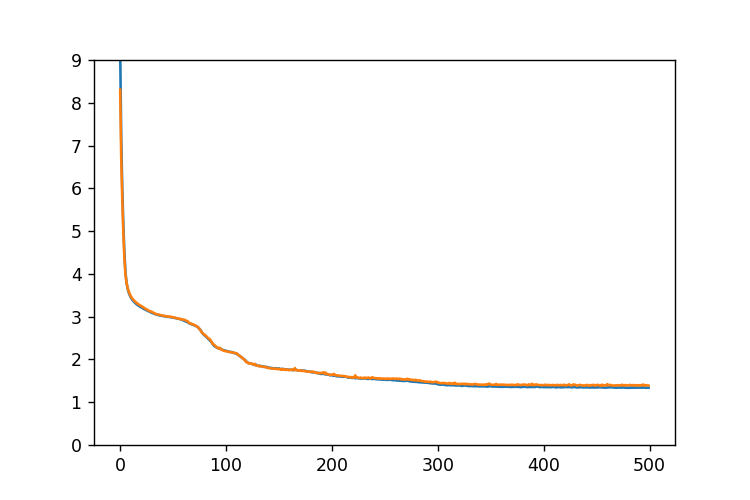

In [17]:
# =============
# PLOT THE LOSS
# =============

plt.figure(figsize=(6, 4))
plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Try out the MDN Model

Now we try out the model by making predictions at 3000 evenly spaced points on the x-axis. 

Mixture models output lists of parameters, so we're going to sample from these parameters for each point on the x-axis, and also try plotting the parameters themselves so we can have some insight into what the model is learning!

In [7]:
# ================
# MAKE PREDICTIONS
# ================

x_test = np.float32(np.arange(-15,15,0.01))
x_test = x_test.reshape(x_test.size,1) 
y_test = model.predict(x_test)

# Split up the mixture parameters (for future fun)
mus = np.apply_along_axis((lambda a: a[:N_MIXES]),1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES:2*N_MIXES]),1, y_test)
pis = np.apply_along_axis((lambda a: mdn.softmax(a[2*N_MIXES:])),1, y_test)

Testing: 3000 samples.


<IPython.core.display.Javascript object>


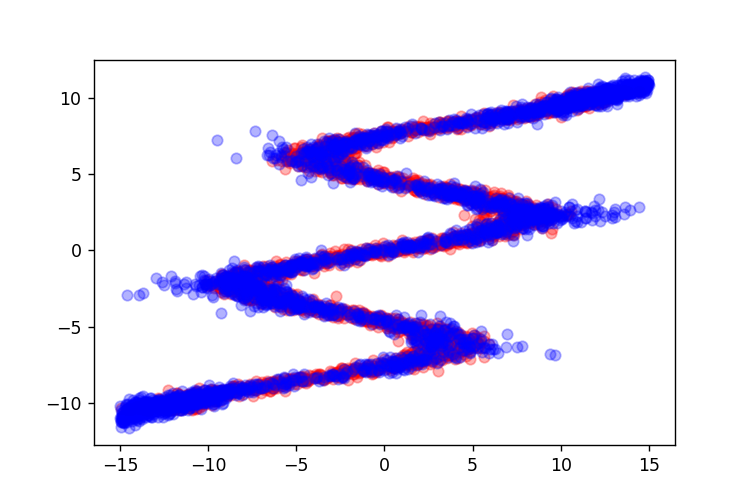

<IPython.core.display.Javascript object>


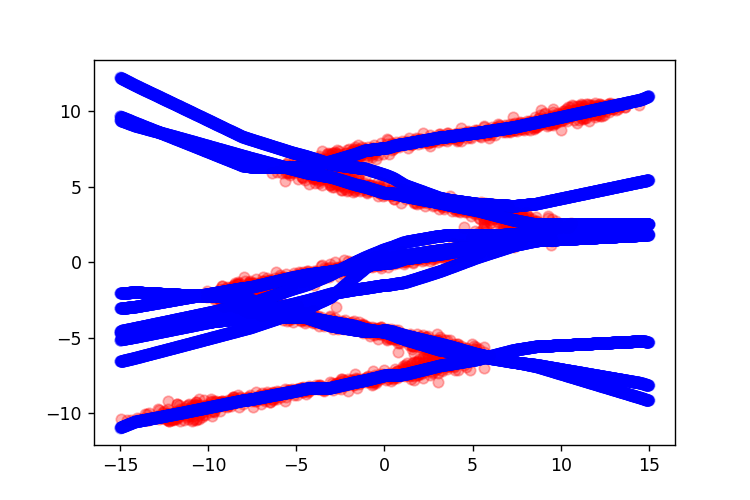

<IPython.core.display.Javascript object>


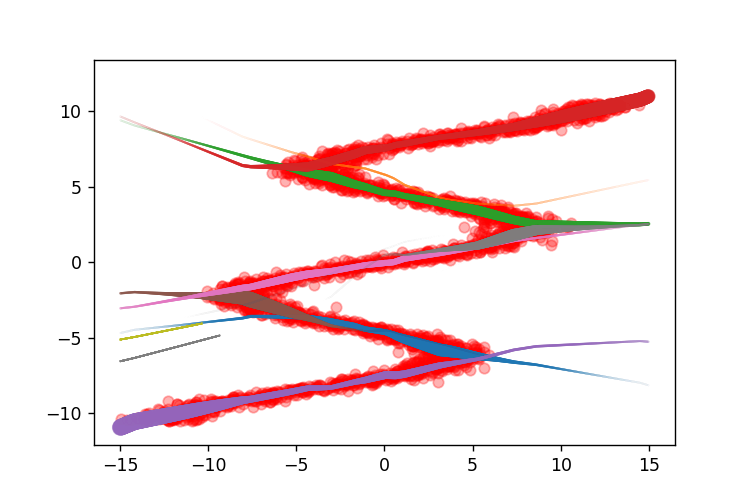

In [24]:
# =============================================
# GENERATE SAMPLES FROM PREDICTED DISTRIBUTIONS
# =============================================

y_samples = np.apply_along_axis(mdn.sample_from_output, 1, y_test, 1, N_MIXES, temp=1.0)

# Plot the samples
plt.figure(figsize=(6, 4))
plt.plot(x_data, y_data, 'ro',
         x_test, y_samples[:,:,0], 'bo',
         alpha=0.3)
plt.show()

# Plot the means
plt.figure(figsize=(6, 4))
plt.plot(x_data, y_data, 'ro',
         x_test, mus, 'bo', 
         alpha=0.3)
plt.show()

# Plot the weightings and variances
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.scatter(x_data, y_data, marker='o', c='r', alpha=0.3)
for i in range(N_MIXES):
    ax1.scatter(x_test, mus[:,i], marker='o', s=200*sigs[:,i]*pis[:,i], alpha=0.3)
plt.show()